# Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# Загрузка датасета

In [3]:
file_name = '../dataset/covid_data_train.csv'
df = pd.read_csv(file_name, sep=',', encoding='utf-8')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Параметры датасета и создание палитры

In [4]:
df.shape

(451, 120)

In [5]:
df.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

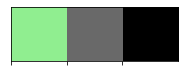

In [6]:
colors = ['lightgreen','dimgray','black']
sns.palplot(sns.color_palette(colors))

# Первичная информация о датасете

In [7]:
df.head(5)

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,...,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
0,52.651055,90.101159,Абаза,17111.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,NaN,2.280000e-11,NaN,NaN,0.0,NaN,64241.0,44921.0,19320.0,0.0
1,53.720902,91.442435,Абакан,165183.0,Сибирский,Хакасия,8.68,NaN,NaN,NaN,...,0.000903,8.340000e-10,0.001383,0.0,1.0,0.0,64241.0,44921.0,19320.0,0.0
2,53.682800,53.655701,Абдулино,20663.0,Приволжский,Оренбургская область,15.95,27.7,542.0,0.05,...,NaN,5.160000e-14,0.000376,NaN,0.0,0.0,270081.0,156761.0,113320.0,0.0
3,44.864953,38.157819,Абинск,34926.0,Южный,Краснодарский край,73.73,17.6,1000.0,0.07,...,NaN,1.190000e-14,0.000186,NaN,0.0,0.0,847286.0,452437.0,394849.0,0.0
4,56.525460,52.997251,Агрыз,19299.0,Приволжский,Татарстан,57.27,28.2,1100.0,0.00,...,NaN,4.750000e-13,0.001003,NaN,0.0,0.0,527462.0,371965.0,155497.0,0.0


In [8]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 120 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    lat                             451 non-null    float64
 1    lng                             451 non-null    float64
 2    name                            451 non-null    object 
 3    population                      426 non-null    float64
 4    district                        451 non-null    object 
 5    subject                         451 non-null    object 
 6    density                         426 non-null    float64
 7    ivl_per_100k                    352 non-null    float64
 8    ivl_number                      352 non-null    float64
 9    ekmo_per_100k                   352 non-null    float64
 10   ekmo_number                     195 non-null    float64
 11   life_quality_place_rating       112 non-null    float64
 12   ecology             

In [9]:
df.describe(include = "all")

,lat,lng,name,population,district,subject,density,ivl_per_100k,ivl_number,ekmo_per_100k,...,epirank_avia,epirank_bus,epirank_train,epirank_avia_cat,epirank_bus_cat,epirank_train_cat,whole_population,urban,rural,has_metro
count,451.000000,451.000000,451,4.260000e+02,451,451,426.000000,352.000000,352.000000,352.000000,...,48.000000,3.320000e+02,276.000000,48.000000,332.000000,276.000000,4.260000e+02,426.000000,426.000000,426.000000
unique,NaN,NaN,419,NaN,8,78,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Вельск,NaN,Центральный,Свердловская область,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,NaN,113,25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,54.466681,56.164058,NaN,6.895187e+04,NaN,NaN,34.436268,21.882955,524.815426,0.190994,...,0.004333,7.413569e-11,0.000926,0.270833,0.093373,0.123188,3.553185e+05,256223.967136,99094.488263,0.002347
std,5.099112,26.846723,NaN,1.382146e+05,NaN,NaN,35.708020,12.507825,423.575026,0.342484,...,0.007131,4.869708e-10,0.002579,0.494204,0.404302,0.370805,2.387497e+05,184819.931057,74614.012375,0.048450
min,42.057858,20.510584,NaN,2.070000e+03,NaN,NaN,0.310000,0.000000,0.010000,0.000000,...,0.000011,8.840000e-307,0.000001,0.000000,0.000000,0.000000,2.814400e+04,13697.000000,4421.000000,0.000000
25%,51.717637,38.684199,NaN,1.672650e+04,NaN,NaN,11.625000,15.300000,178.000000,0.000000,...,0.000489,8.630000e-14,0.000054,0.000000,0.000000,0.000000,1.718245e+05,121545.000000,55355.000000,0.000000
50%,55.322518,45.384491,NaN,3.060750e+04,NaN,NaN,22.200000,24.500000,426.000000,0.050000,...,0.001304,3.150000e-13,0.000213,0.000000,0.000000,0.000000,2.886650e+05,199865.000000,82905.000000,0.000000
75%,57.400666,61.433020,NaN,6.284600e+04,NaN,NaN,43.250000,31.400000,726.000000,0.115000,...,0.005691,8.692500e-13,0.000697,0.250000,0.000000,0.000000,5.054430e+05,317173.000000,115656.250000,0.000000


In [10]:
#удаление дубликатов
df.drop_duplicates(subset=["name", "district"], keep = 'first', inplace = True)

# Исследование целевого признака

(inf_rate — частота заражения)

In [11]:
df['inf_rate'].isna().sum()

24

In [12]:
df['inf_rate'].value_counts()

1.609438    51
1.098612    48
2.708050    43
0.693147    41
1.386294    35
3.218876    25
2.079442    21
2.302585    21
2.564949    21
2.397895    19
4.718499    19
1.945910    18
1.791759    14
2.890372    14
2.772589     7
3.135494     4
2.639057     2
Name: inf_rate, dtype: int64

C:\Users\ilyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inf_rate', ylabel='Density'>

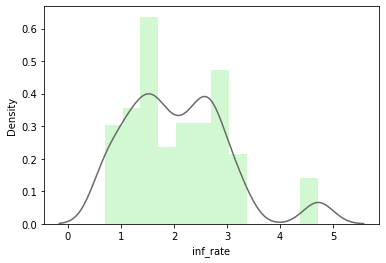

In [13]:
sns.distplot(df['inf_rate'], color=colors[0],
             kde_kws={"color": colors[1], "lw": 1.5, "label": "KDE"})

<AxesSubplot:xlabel='inf_rate'>

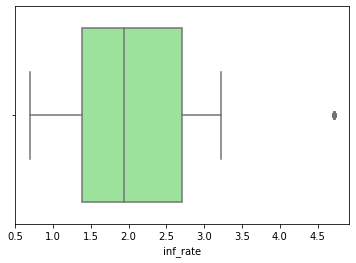

In [14]:
sns.boxplot(data=df, x='inf_rate', color=colors[0])

In [15]:
out = df.query("inf_rate > 4").shape[0]
print(f"Количесвто строк в датасете со значением целевой переменной выходящей за межквартильный размах: {out} ({round(out/len(df)*100, 2)}%)")

Количесвто строк в датасете со значением целевой переменной выходящей за межквартильный размах: 19 (4.45%)


In [16]:
df.query("inf_rate > 4")[['name', 'region_x', 'inf_rate']]

,name,region_x,inf_rate
55,Балашиха,Московская область,4.718499
103,Бронницы,Московская область,4.718499
122,Верея,Московская область,4.718499
142,Волоколамск,Московская область,4.718499
148,Воскресенск,Московская область,4.718499
168,Голицыно,Московская область,4.718499
202,Дмитров,Московская область,4.718499
206,Домодедово,Московская область,4.718499
210,Дубна,Московская область,4.718499
217,Егорьевск,Московская область,4.718499


# Разведочный анализ по группам

## Географическое расположение и населенность

•	whole_population — население по каждому населенному пункту

•	urban/rural – количество городских и сельских жителей

•	name – название населенного пункта

•	district – федеральный округ

•	region_x – регион

•	density – плотность населения

•	Lat – северная широта населенного пункта

•	Lng – восточная долгота населенного пункта

In [ ]:
location = df[['name', 'lat', 'lng', 'region_x', 'district', 'population', 'whole_population', 'urban', 'rural', 'density', 'inf_rate']]
location[:3]

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(data=location, x='inf_rate', hue='district')

Можно выделить Приволжский край и Уральский край для которых значения смещены в большую сторону, но не исключают и низкого уровня заражения в отдельных городах. Это подтверждает гипотезу о том, что обособленный признак, касающийся  географического расположения не имеет особой ценности. 

In [ ]:
dfi = pd.DataFrame({'inf_rate' : df['inf_rate'].unique()}).sort_values(by='inf_rate', ascending=False)
dfi

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(location.corr())
sns.heatmap(location.corr(), linewidths=2, annot=True, square=True, mask=mask, cmap='mako')

Признаки касающиеся числа городских и сельских жителей имеют среднюю корреляцию с целевым признаком, также как и плотность населения. Однако проверим, не является ли корреляция ложной и вызванной каким-то сторонним фактором.

In [ ]:
sns.pairplot(data=location[['whole_population', 'urban', 'rural', 'density', 'inf_rate']], corner=True)

In [ ]:
for col in (['population', 'whole_population', 'urban', 'rural', 'density']):
    location = outlier(location, col, 'me')

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(location.corr())
sns.heatmap(location.corr(), linewidths=2, annot=True, square=True, mask=mask, cmap='mako')

In [ ]:
def outlier(dfo, name, p):
    q25, q75 = np.percentile(dfo[name].dropna(), [25, 75])
    iqr = q75 - q25
    mx = q75+(1.5*iqr)
    mn = q25-(1.5*iqr)
    if p == "me":
            p = int(df[name].median())
    elif p == "mn":
            p = int(df[name].mean())
    else:
        print('Неверное значение p для замены выбросов, выберите mn или me')
    dfo[name] = dfo[name].apply(lambda x: p if ((x < mn) | (x > mx)) else x)
    return dfo

Численность городского и сельского населения имеет значение и могут быть использованы для обучения модели, однако достаточно высокая корреляция с целевым признаком не соответствует действительности и вызвана выбросом в виде Московской области (гипотеза подтвердилась, а значит последующая проверка признаков будет происходить с учетом региональных особенностей)

## Население

•	urban50–54years, urban55–59years, urban60–64years,

•	urban65–69years, urban70–74years, urban75–79years,

•	urban80–84years, urban85–89years, urban90–94years,

•	rural50–54years, rural55–59years, rural60–64years,

•	rural65–69years, rural70–74years, rural75–79years,

•	rural80–84years, rural85–89years, rural90–94years 

In [18]:
old_urban = df.filter(like="urban").drop(['num_phones_urban_2019',	'urban'], axis=1).join(df[['inf_rate', 'region_x']])
old_urban

,urban_50-54_years,urban_55-59_years,urban_60-64_years,urban_65-69_years,urban_70-74_years,urban_75-79_years,urban_80-84_years,urban_85-89_years,urban_90-94_years,inf_rate,region_x
0,18725.00,23155.99,24849.00,21753.00,12647.00,6409.00,6580.00,2605.00,1235.00,1.386294,Республика Хакасия
1,18725.00,23155.99,24849.00,21753.00,12647.00,6409.00,6580.00,2605.00,1235.00,1.386294,Республика Хакасия
2,65561.00,81799.00,80373.99,64567.99,41731.00,22722.00,27330.00,8518.00,4254.00,2.079442,Оренбургская область
3,181771.00,206916.00,198170.99,179246.99,124592.00,72718.99,80976.99,24048.99,10715.99,2.890372,Краснодарский край
4,168745.99,211818.99,204298.99,160730.99,102643.00,54302.00,60033.99,24832.99,10697.00,2.708050,Республика Татарстан
...,...,...,...,...,...,...,...,...,...,...,...
446,26630.99,32777.99,33485.00,27926.00,17744.00,9701.00,11430.00,4576.00,1756.00,0.693147,Костромская область
447,28495.00,36122.00,37897.00,33188.00,21889.00,11324.00,13646.99,4849.00,2200.00,0.693147,Курганская область
448,25057.00,29820.99,31966.99,27233.99,17941.99,9271.00,10290.00,4000.00,1453.00,1.386294,Новгородская область
449,29207.00,35069.99,38658.00,32859.00,22149.00,11656.00,12857.00,4572.99,1975.00,1.386294,Орловская область


In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(old_urban.corr())
sns.heatmap(old_urban.corr(), linewidths=2, annot=True, square=True, mask=mask, cmap='mako')

Чем больше популяция, тем больше населения с пенсионерным возрастом, чем больше людей с возрастом 50-54, тем больше будет людей с возрастом 55-59 и тд
Рассуждение кажется логичным, однако некоторые категории возрастные имеют бОльшую значимость. 

Также не стоит забывать о выбросе - Московская область.

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(old_urban.query("region_x != 'Московская область'").corr())
sns.heatmap(old_urban.query("region_x != 'Московская область'").corr(), linewidths=2, annot=True, square=True, mask=mask, cmap='mako')

In [ ]:
sns.distplot(df[['urban_50-54_years']].dropna().astype(int), color=colors[0])

In [ ]:
sns.histplot(data=df, x='urban_50-54_years', y='inf_rate', color=colors[1])

In [ ]:
df[['urban_85-89_years','region_x', 'population', 'district', 'inf_rate']].sort_values(by='urban_85-89_years', ascending=False).dropna().drop_duplicates(subset="region_x", keep = 'first')

In [ ]:
fig = px.scatter(df.dropna(), x="urban_85-89_years", y="inf_rate", color='district', size='population', hover_data=['region_x'])
fig.show()

In [ ]:
fig = px.scatter(df.dropna(), x="urban_50-54_years", y="inf_rate", color='district', size='population', hover_data=['region_x'])
fig.show()

Признак для модели: 'urban_50-54_years' - имеет со всеми остальными признаками из группы очень высокую корреляцию и наибольшую с целевым, также стоит учесть возрастные категории 60е и 70е, тк они являются рубежными. 

Также было выявлено, что численность городских жителей пенсионерного возраста выше в следующих округах: Сибирский, Приволжский и Уральский 

In [19]:
old_rural = df.filter(like="rural").drop(['num_phones_rural_2018', 'rural'], axis=1).join(df[['inf_rate', 'region_x']])
old_rural.head()

,rural_50-54_years,rural_55-59_years,rural_60-64_years,rural_65-69_years,rural_70-74_years,rural_75-79_years,rural_80-84_years,rural_85-89_years,rural_90-94_years,inf_rate,region_x
0,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,1.386294,Республика Хакасия
1,9467.00,12105.00,11901.00,9621.00,4897.00,2448.00,2906.00,1219.00,434.00,1.386294,Республика Хакасия
2,54073.99,67288.00,61433.99,44975.00,27214.99,17180.99,21453.99,6733.00,3378.99,2.079442,Оренбургская область
3,154571.00,186884.00,178566.99,154503.00,99462.00,65497.99,76176.99,21533.99,12139.99,2.890372,Краснодарский край
4,68434.99,76880.99,67086.99,49885.99,31964.99,25153.00,31070.99,15329.99,6277.00,2.708050,Республика Татарстан


In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(old_rural.corr())
sns.heatmap(old_rural.corr(), linewidths=2, annot=True, square=True, vmin=.0, mask=mask, cmap='mako')

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(old_rural.query("region_x != 'Московская область'").corr())
sns.heatmap(old_rural.query("region_x != 'Московская область'").corr(), linewidths=2, vmin=.0, annot=True, square=True, mask=mask, cmap='mako')

Корреляция количества сельских жителей с целевым признаком также зависит от региональных особенностей, однако значимость для нас все же может иметь возрастная категория - 80е, что меньше подверглись изменениям с учетом выборса.  

## Занятность населения по возрастным группам

•	workratio15–72years, workratio55–64years, workratio15–24years, workratio15–64years, workratio25–54years 

In [ ]:
work = df.filter(like="work_ratio", axis=1).join(df[['inf_rate', 'region_x']])
work[:3]

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
mask = np.triu(work.corr())
sns.heatmap(work.corr(), linewidths=2, annot=True, square=True, mask=mask, cmap='mako')

In [ ]:
Признак занятости может быть использован для обучения модели, хотя интуитивно его полезность было сложно предположить.

Значительную роль играет занятость пенсионеров, что можно объяснить бОльшим контактом с людьми и как следствие бОльше вероятность заразиться.

В связи с этим следует добавить рекомендации по защите здоровья работающих пенсионеров.

Например, улучшение качества воздухообмена или включение в рабочий график времени кварцевания.